<h2><center>Assignment 3</center></h2>
  <h3><center> Medical Image Segmentation, SVM and Robust PCA </center></h3>
   
   
<center><font color='red'><b>Given date: Thursday November 14</b></font></center>

<center><font color='red'><b>Due date: Friday December 9 </b></font></center>
<img src="imageSegmentation2.jpeg" width=400 height=400 />
 


### Question 1 (6pts). 

In this first part, we will rely on K-means to identify the white matter, gray matter and the Cerebrospinal Fluid (CSF) on T1 Magnetic Resonance Images. Start by downloading the files 't1_ai_msles2_1mm_pn3_rf0.mnc.gz' and 't1_icbm_normal_1mm_pn1_rf0.mnc.gz' from github. To open those files, you will need the nibabel package (you can install this package using the command 'pip install nibabel' from the command line). Once the package is installed, use the lines below to visualize the images. 


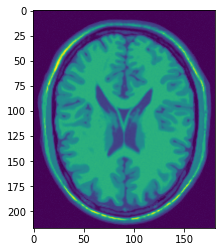

In [2]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
img = nib.load('t1_icbm_normal_1mm_pn1_rf0.mnc')
data = img.get_fdata()
plt.imshow(data[90,:,:])
plt.show()

Take your training image to be frame 90 as above. We will start by removing the skull from the image. In order to get an idea of the pixels distribution, plot the histogram of the image using the 'hist' function from pyplot.

In [ ]:
### 


Once you have the histogram, use this histogram to generate a binary version of the image. For this you can for example rely on the 'threshold' function from opencv. Determine the threshold (approximately) from the histogram so that the background pixels are set to 0 and the skull/head pixels (i.e. skull included) are set to 1 (as much as possible).

In [ ]:
# put your code here


To get rid of the remaining black pixels located inside the head, we can use the functions 'erode' and 'dilate' from opencv. Dilate will increase the size of any white region while erode will shrink those regions. You can choose a 5x5 filter for both morphological operators. PLay a little with the filter size to determine the optimal combination of filter for the removing of the skull

In [ ]:
# put your code here


Once you have the mask for the head, shrink it a little more to get rid of the skull (The mask might be defined as taking values in [0,255] with 0 being black and 255 being white). Transform it to {0,1}

In [ ]:
# put your code here


Get the final (skull free) image by multiplying your original image with the mask

In [ ]:
# put your code here


Recalculate the histogram and find the (approximate) centers of each class. To get a clearer picture of the classes, you might want to use np.where and np.delete to remove the background pixels (those taking values sufficiently close to 0)

In [ ]:
### put your code here

Finally, apply the Kmeans algorithm (with K=3) to the image obtained by removing the background pixels. Display the final result

In [ ]:
from sklearn.cluster import KMeans


# put your code here


### Question II (10pts): Max margin classifiers and outliers

Consider the dataset below. We would like to learn a classifier for this dataset that maximizes the margin (i.e. such that the distance between the closest points to the classifier is maximized). We have seen that one can solve this problem by means of the constrained formulation

\begin{align*}
\min_{\mathbf{\beta}} \quad & \|\mathbf{\beta}\|^2 \\
\text{subject to} \quad & y(\mathbf{x}^{(i)})t^{(i)} \geq 1 
\end{align*}

where $y(\mathbf{x}^{(i)}) = \mathbf{\beta}^T\mathbf{x}^{(i)} + \beta_0$. We might sometimes want to use a (softer) unconstrained formulation. in particular, when selecting this option, we can use the following function known as the _Hinge loss_ 

\begin{align*}
\max(0, 1-t^{(i)}y(\mathbf{x}^{(i)})) = \max(0, 1-t^{(i)}(\mathbf{\beta}^T\mathbf{x}^{(i)}+\beta_0))
\end{align*}

For such a loss, we can derive a softer, unconstrained version of the problem as 

\begin{align*}
\min_{\mathbf{\beta}} \quad & \|\mathbf{\beta}\|^2 + \frac{C}{N}\sum_{i=1}^N \max(0, 1-t^{(i)}(\mathbf{\beta}^T\mathbf{x}^{(i)}+\beta_0))
\end{align*}

In short we penalize a point only if this point lies on the wrong side of the plane.

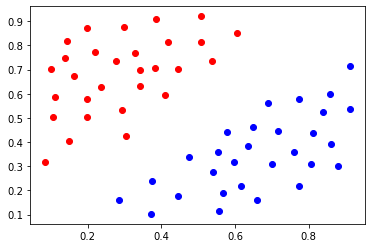

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

from scipy.io import loadmat
pointsClass1 = scipy.io.loadmat('points_class1_Lab2_Ex1.mat')['points_class1_Lab2_Ex1']
pointsClass2 = scipy.io.loadmat('points_class2_Lab2_Ex1.mat')['points_class2_Lab2_Ex1']


plt.scatter(pointsClass1[:,0], pointsClass1[:,1], c='r')
plt.scatter(pointsClass2[:,0], pointsClass2[:,1], c='b')
plt.show()

#### Question II.a (3pts)

Start by completing the function below which should return the value and gradient of the hinge loss at a point $\mathbf{x}^{(i)}$. What is the gradient of the hinge loss?

In [ ]:

def HingeLoss(x, t, beta):
    
    '''Returns the value and gradient of the hinge 
    loss at the point x'''
    
    return value, gradient

#### Question II.b (7pts)

Once you have the function, implement a function HingeLossSVC that takes as input a starting weight vector $\mathbf{\beta}$ and intercept $\beta_0$ as well as the set of training points and a value for the parameter $C$ and returns the maximum margin classifier.  

In [ ]:
def HingeLossSVC(beta_init, training, C, targets):
    
    '''Returns the maximal margin classifier for the 
    training dataset'''
    

    return beta

### Question III (10pts): Robust PCA for video surveillance 

Principal Component Analysis (PCA) retains an approximation of an original dataset $X$ by focusing on the largest singular values. Such an order $K$ approximation can be obtained from the singular value decomposition $\boldsymbol U \boldsymbol \Sigma \boldsymbol V^T$ by truncating $\boldsymbol U$ to the first $K$ columns, retaining the $K\times K$ diagonal matrix $\boldsymbol \Sigma_k$ as well as the first $K$ rows of $\boldsymbol V^T$, $\boldsymbol V_k^T$, and writing the approximation as $\boldsymbol U_k \boldsymbol \Sigma_k \boldsymbol V^T_k$. This approach is particularly efficient when each of the feature vectors (or images in this case) are close to each other. When there are sharp variations across images, such as when an object appears, move throughout the images and then disapears, a simple PCA does not suffice anymore and one might want to extend it to something more robust. The escalator sequence below is an example of such sequence (the movie can be found on github). 

(20800,)


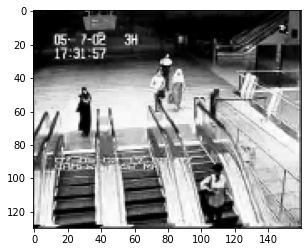

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# read video

import scipy.io
movie = scipy.io.loadmat('escalator_data.mat')
#frame0 = 
print(np.shape(movie['X'][:,0]))

plt.imshow(movie['X'][:,0].reshape((160,130)).swapaxes(0, 1), cmap='gray')
plt.show()

The idea of Robust PCA is to add a "sparse" component to the traditional PCA decomposition. Given a collection of images that we store as the columns of the matrix $X$, one then looks for a decomposition
 
\begin{align} 
\boldsymbol X = \boldsymbol Y + \boldsymbol S
\end{align}

Where $Y$ is a matrix which contains the original PCA decomposition, and thus encodes the part of the images that remains approximately constant throughout the sequence (background), and $\boldsymbol S$ is the sparse part (i.e a sequence of images that are varying through the sequence but only at a small number of pixel positions in the images (foreground), in other words most of the pixels in $S$ are assumed to be zero). To recover each part one approach is to proceed as follows, see [Candes et al.](https://arxiv.org/pdf/0912.3599.pdf)

We let $\mu$ to denote the parameter that controls the amount of dara we want to store in the sparse foreground extraction part, $\boldsymbol S$. A good choice is to take $\mu = n_1n_2/4\|\mathbf{X}\|_1$ where $\mathbf{X}\in\mathbb{R}^{n_1\times n_2}$ encodes the video surveillance sequence (each frame being stacked as a column of $\mathbf{X}$) and $\|\mathbf{X}\|_1$ denotes the entry wise $\ell_1$ norm of $\mathbf{X}$, $\mathbf{X} = \sum_{ij} |X_{ij}|$

The algorithm then proceeds as follows


__Initialize__ $Y$, $S$ to $0$

__Step 1.__ Compute the truncated SVD of the matrix $X - S - \mu^{-1}Y$, i.e. let $X - S - \mu^{-1}Y = U\Sigma V^T$. The truncated SVD is then obtained by replacing the diagonal matrix of singular values with the truncation 
$$ 
\sigma \leftarrow \text{sign}(\sigma)\max(|\sigma| - \mu, 0)  
$$

and store it in $L$, $L = SVD_{\mu}(X - S - \mu^{-1}Y)$ 



__Step 2.__ Apply the thresholding operator $f(x) = \text{sign}(x)\max(|x| - \lambda \mu, 0) $ with threshold $\lambda\mu$ to the entries of the matrix $X - L + \mu^{-1}Y$ and store the result in $\mathbf{S}$.

__Step 3.__ Update the matrix $Y$ as $Y \leftarrow Y + \mu(X - L - S)$


A good approach to initialize the parameters is to take $lambda = 1/\max(n_1,n_2)$ where $\max(n_1,n_2)$ is the max number of rows or columns of the data matrix. One can also terminate the algorithm when $\|X-L-S\|_F \leq  \delta \|X\|_F$ where $\|X\|_F$ is the Frobenius norm of the matrix and $\delta$ can be taken for example as $10^{-7}$. 


Additional indications: if computing the full SVD from linalg is too expensive, you can replace it with the fast randomized PCA from facebook (see [fbpca](https://fbpca.readthedocs.io/en/latest/)) or a sparse SVD.


#### Question 3.a. (8pts) Complete the code below which separates the sparse part from the PCA decomposition

In [ ]:
import numpy as np 
from __future__ import division
from scipy.sparse.linalg import svds



def robustPCA(X, delta=1e-6, mu=None, maxiter=500):

    '''
    The function should return a PCA like part stored in 'L' with only a few singular values 
    that are non zero and a sparse sequence 'S' in which the images are black except w very 
    limited number of pixels
    '''
    
    # Initialize the tuning parameters.
    lam = # put your value for lambda
    if mu is None:
        
        # complete with your value for mu
        
    # Convergence criterion.
    norm = np.sum(X ** 2)

    # Iterate.
    i = 0
    rank = np.min(shape)
    S = np.zeros(shape)
    Y = np.zeros(shape)
    while i < max(maxiter, 1):
        
        
        # Step 1. Compute and truncate the SVD
        
        

        # Step 2. Truncate the entries of X - L + mu^(-1)Y 
        

        # Step 3. Update the matrix Y
        
        

        # Convergence criterion
        err = np.sqrt(np.sum(step ** 2) / norm)
        if err < delta:
            break
        i += 1

    if i >= maxiter:
        break
        
    return L, S

#### Question 3.b. (2pts) 

Apply your function to the escalator sequence and display the result on at least one frame. Use subplot to display the extracted background and its corresponding foreground side by side. 

In [ ]:
# put your code here